In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from collections import defaultdict
import json
import numpy as np
import pandas as pd

In [2]:
def is_experiment_start(line):
    return line.startswith('evaluating for')

def skip_n_experiments(input_file, experiment_num):
    current_experiment = 0
    while current_experiment < experiment_num:
        line = input_file.readline()
        if is_experiment_start(line):
            current_experiment += 1
            
def parse_experiment(experiment_log):
    current_recommender = None
    result = []
    for line in experiment_log:
            if line.startswith('evaluating '):
                current_recommender = line.split(' ')[1]
            try:
                experiment_results = json.loads(line)
                experiment_results['model_name'] =  current_recommender
                result.append(experiment_results)
            except:
                pass
    return result
def get_data_from_logs(logfile, experiment_num):
    current_experiment = 0
    with open(logfile) as input_file:
        skip_n_experiments(input_file, experiment_num)
        experiment_log = []
        for line in input_file:
            if is_experiment_start(line):
                break
            else:
                experiment_log.append(line.strip())
        return parse_experiment(experiment_log)

In [3]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [4]:
experiment_logs = './results/booking_config_2021_01_09T22_50_22/stdout'
data = get_data_from_logs(experiment_logs, 0)


In [5]:
df = pd.DataFrame(data).set_index('model_name').sort_values('ndcg@40')
df

,precision@4,SPS@4,ndcg@4,ndcg@40,model_build_time,model_inference_time,model_metadata
model_name,,,,,,,
top_recommender,0.014264,0.057057,0.036868,0.086263,0.097470,0.010851,{}
svd_recommender,0.062312,0.249249,0.190089,0.243860,4.171454,12.676384,{}
conditional_top_recommender,0.092176,0.364364,0.278119,0.347911,0.008507,0.016041,{}
APREC-GMLPHE-Lambdarank,0.109610,0.438438,0.351485,0.437195,57994.067580,40.432858,"{'epochs_trained': 72, 'best_val_ndcg': 0.4608..."


<IPython.core.display.Javascript object>


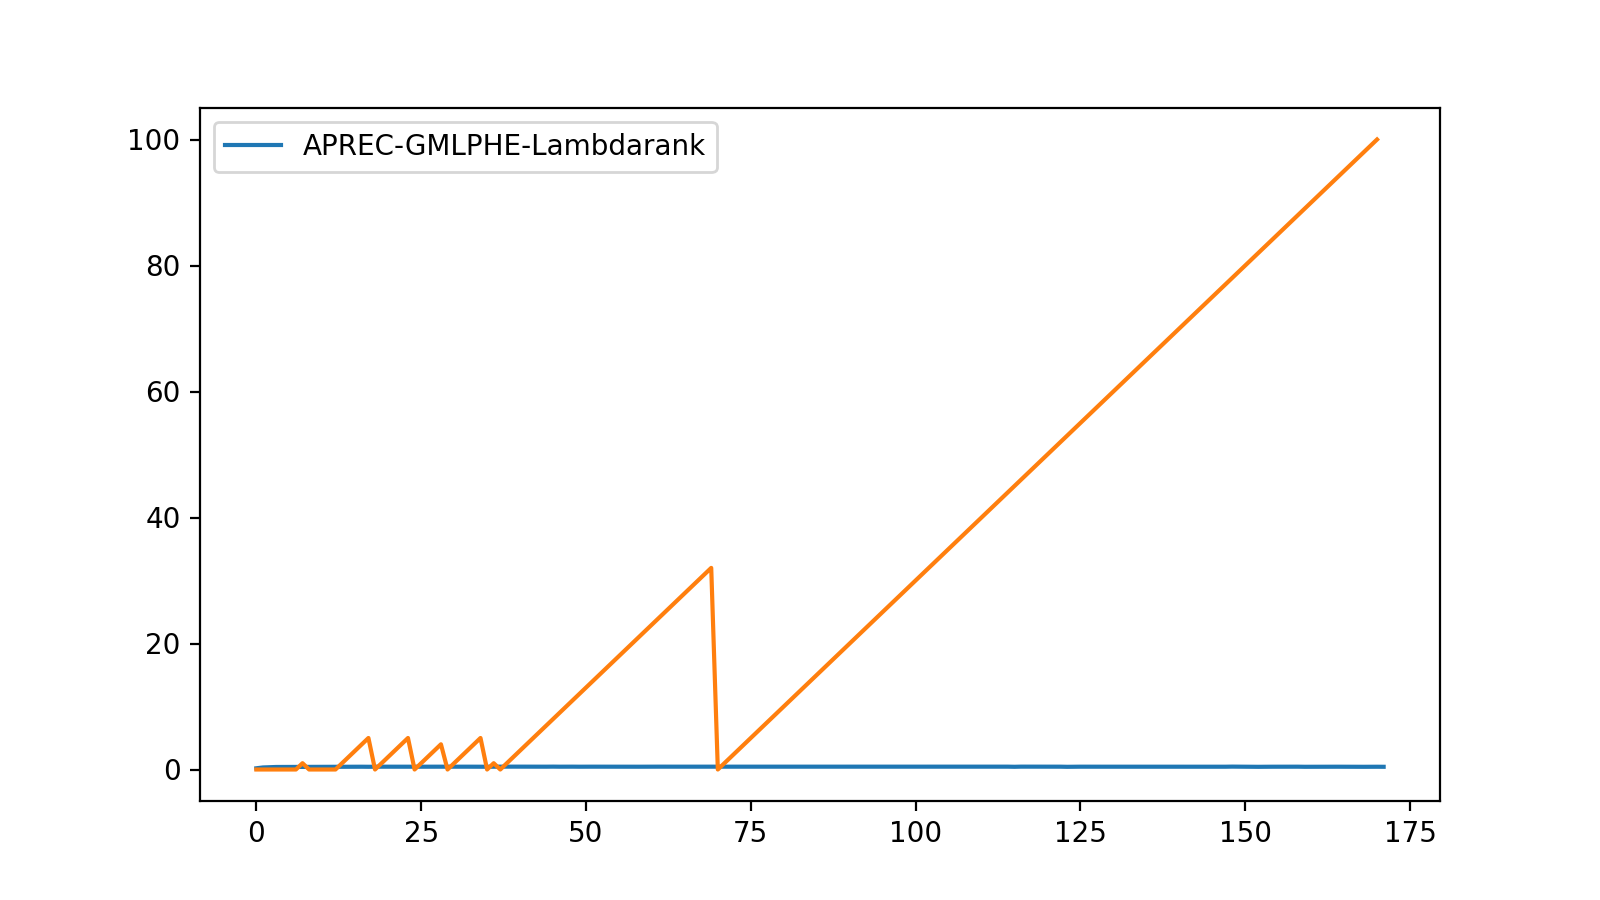

In [6]:
plt.figure(figsize=(8, 4.5))
for recommender in data:
    if 'val_ndcg_history' in recommender['model_metadata']:
        history = moving_average(recommender['model_metadata']['val_success_history'], 1)
        plt.plot(history, label=recommender['model_name'])
    
plt.legend()


In [7]:
max(recommender['model_metadata']['val_success_history'])

0.4608449935913086

In [8]:
arr= recommender['model_metadata']['val_success_history']

In [10]:
best = 0
time_since_best = []
for i in range (1, len(arr)):
    if arr[i] > arr[best]:
        best = i
    time_since_best.append(i - best)

In [12]:
plt.plot(time_since_best)